# Should your fund invest in Bitcoin?

## 📖 Background
You work as an analyst at an investment fund in New York. Your CFO wants to explore if it is a good idea to invest some of the fund's assets in Bitcoin. You have to prepare a report on this asset and how it compares to the stock market in general.

## Contents
[1. The Data](#link_1) <br>
&nbsp;&nbsp;[1.1 Data Preparation](#link_11) <br>
&nbsp;&nbsp;[1.2 EDA ](#link_12) <br>
[2. Defining Indices](#link_2)<br>
&nbsp;&nbsp;[2.1 Daily Growth Index (DGI)](#link_21) <br>
&nbsp;&nbsp;[2.2 Monthly Growth Index (MGI)](#link_22) <br>
[3. Concluding Remarks](#link_31)<br>


# 💪  Competition Challenge
Create a report that covers the following:

1. How does the performance of Bitcoin compare to the S&P 500 and the price of gold?
2. Analyze Bitcoin's returns and volatility profile. Do you believe it could help improve the performance of a portfolio? Do you believe Bitcoin could be used as a hedge versus inflation?
3. The CFO is looking to lower volatility in the fund. Explore building a portfolio using some or all of these assets. Make a recommendation that minimizes overall risk.

<a id = 'link_1'></a>
# 1. The Data

We have access to daily performance of bitcoin and S&P 500 between September 17, 2014 to November 17, 2021, and monthly data on gold and inflation for September, 2014 to November, 2021. The key variables are described below:

### Bitcoin daily data in US dollars
- "date" - date from September 17, 2014 to November 17, 2021
- "open" - the price at the beginning of the trading day
- "high" - the highest price reached that day
- "low" - the lowest price reached that day
- "close" - the price at the closing of the trading day
- "volume" - how many Bitcoin were traded that day

### S&P 500 daily data
- "date" - date from September 17, 2014 to November 17, 2021
- "open" - the index level at the beginning of the trading day
- "high" - the highest level reached that day
- "low" - the lowest level reached that day
- "close" - the level at the closing of the trading day
- "volume" - how many shares in the companies that make up the index were traded that day

### Inflation and gold as monthly data (referred to as inflation data from here on)
- "date" - date from September, 2014 to November, 2021
- "gold_usd" - price in usd of gold for that month
- "cpi_us" - the inflation index for the US for that month (cpi = consumer price index)

<a id = 'link_11'></a>
## 1.1 Data Preparation:  
A cursory inspection of the data type and null stats show that S&P 500 data and the inflation data do not have any missing data points and their variables have expected data types. The bitcoin data has some null variables that were identified. All varaibles except for the date are missing for these entires, so we dropped these values. (note: The bitcoin dataset has more entries since data was recorded for weekeneds and national holidays, unlike S&P 500) 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import datetime as dt

In [2]:
#importing relevant data files:
bitcoin = pd.read_csv('./data/bitcoin-usd.csv', parse_dates=['date'])
sp500 = pd.read_csv('./data/sp500.csv', parse_dates=['date'])
monthly_data = pd.read_csv('./data/monthly_data.csv', parse_dates=['date'])

print('bitcoin data structure: \n', bitcoin.head(), '\n')
print('sp500 data structure: \n', sp500.head(), '\n')
print('gold and inflation monthly data structure: \n',  monthly_data.head())

bitcoin data structure: 
         date        open        high         low       close      volume
0 2014-09-17  465.864014  468.174011  452.421997  457.334015  21056800.0
1 2014-09-18  456.859985  456.859985  413.104004  424.440002  34483200.0
2 2014-09-19  424.102997  427.834991  384.532013  394.795990  37919700.0
3 2014-09-20  394.673004  423.295990  389.882996  408.903992  36863600.0
4 2014-09-21  408.084991  412.425995  393.181000  398.821014  26580100.0 

sp500 data structure: 
         date         open         high          low        close      volume
0 2014-09-17  1999.300049  2010.739990  1993.290039  2001.569946  3209420000
1 2014-09-18  2003.069946  2012.339966  2003.069946  2011.359985  3235340000
2 2014-09-19  2012.739990  2019.260010  2006.589966  2010.400024  4880220000
3 2014-09-22  2009.079956  2009.079956  1991.010010  1994.290039  3349670000
4 2014-09-23  1992.780029  1995.410034  1982.770020  1982.770020  3279350000 

gold and inflation monthly data structure: 
  

In [3]:
#loooking into the data to ensure there are no missing entries/data types make sense:
bitcoin.info()
sp500.info()
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 6 columns):
date      2619 non-null datetime64[ns]
open      2615 non-null float64
high      2615 non-null float64
low       2615 non-null float64
close     2615 non-null float64
volume    2615 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 122.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805 entries, 0 to 1804
Data columns (total 6 columns):
date      1805 non-null datetime64[ns]
open      1805 non-null float64
high      1805 non-null float64
low       1805 non-null float64
close     1805 non-null float64
volume    1805 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 84.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 3 columns):
date        87 non-null datetime64[ns]
gold_usd    87 non-null float64
cpi_us      87 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.1 

In [4]:
#identifying and dropping the null entires in the bitcoin data:
print(bitcoin[bitcoin.isnull().any(axis=1)])
bitcoin.dropna(inplace = True)
bitcoin.info()

           date  open  high  low  close  volume
2039 2020-04-17   NaN   NaN  NaN    NaN     NaN
2214 2020-10-09   NaN   NaN  NaN    NaN     NaN
2217 2020-10-12   NaN   NaN  NaN    NaN     NaN
2218 2020-10-13   NaN   NaN  NaN    NaN     NaN
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2615 entries, 0 to 2618
Data columns (total 6 columns):
date      2615 non-null datetime64[ns]
open      2615 non-null float64
high      2615 non-null float64
low       2615 non-null float64
close     2615 non-null float64
volume    2615 non-null float64
dtypes: datetime64[ns](1), float64(5)
memory usage: 143.0 KB


<a id = 'link_12'></a>
## 1.2 Expolatory data analysis (EDA)

We selected box plots as the the primary tool for EDA, as box plots make it easy to visualize the general spread of the data, and help us get a general gist of the amount of outliers that exist within our data. Presence of a large number of outliers, as well as a wide spread, can be good markers for volatility in the assets. 

Using box plots, we summarize the data over different months and over different years. This allows us to track the price of our assets over time and get a estimation of the variability in the data over different periods of time. (We do not use box plots to display monthly data for gold and inflation since for these quantities, we are working with one data point per month.) 

In our EDA, we use the closing values for both bitcoin prices and S&P indices. The high and low values are extrema points for the day and are poor representations to how the average value of an asset changes over a large period of time. So, we did not use them for EDA, where our aim is to get a big picture of the market. They can, however, be useful in calculating volatility of the asset, but will not be considered further in this analysis. Opening prices/indices were assumed to be influenced by after market trends and trading (applies more to S&P than bitcoin). Compared to them, the closing values were assumed to be settled values of the assets for the day, and therefore a more stable representative of underlying asset value. 


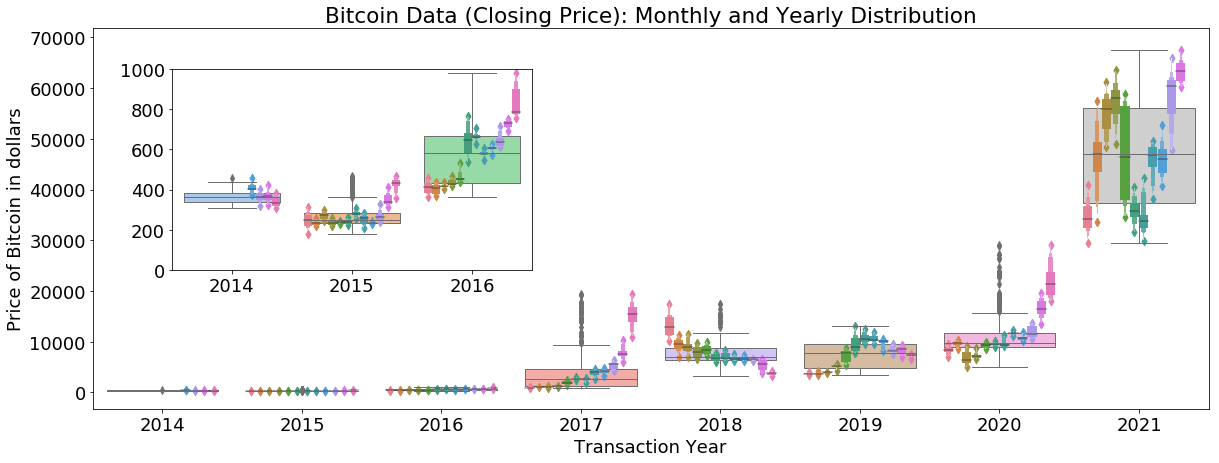

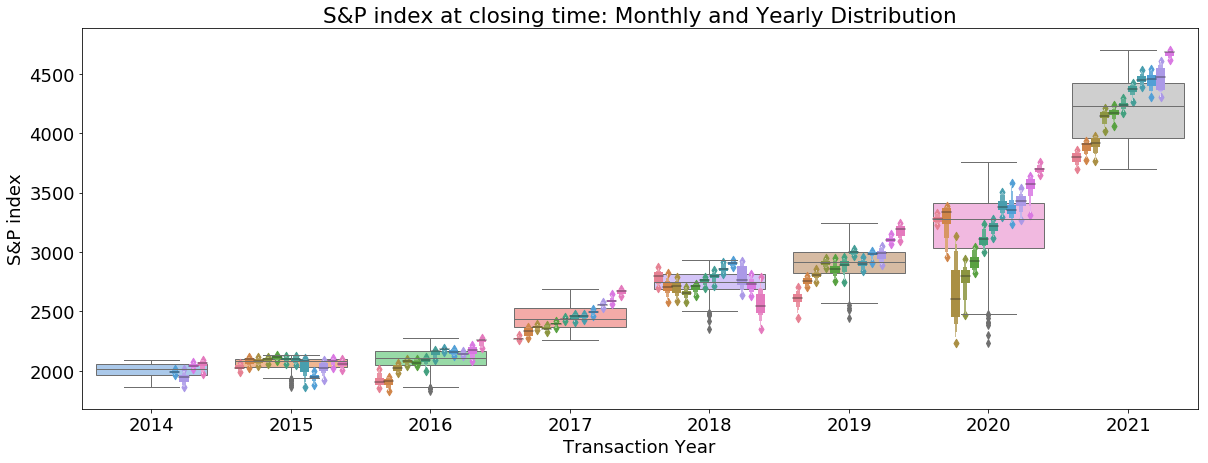

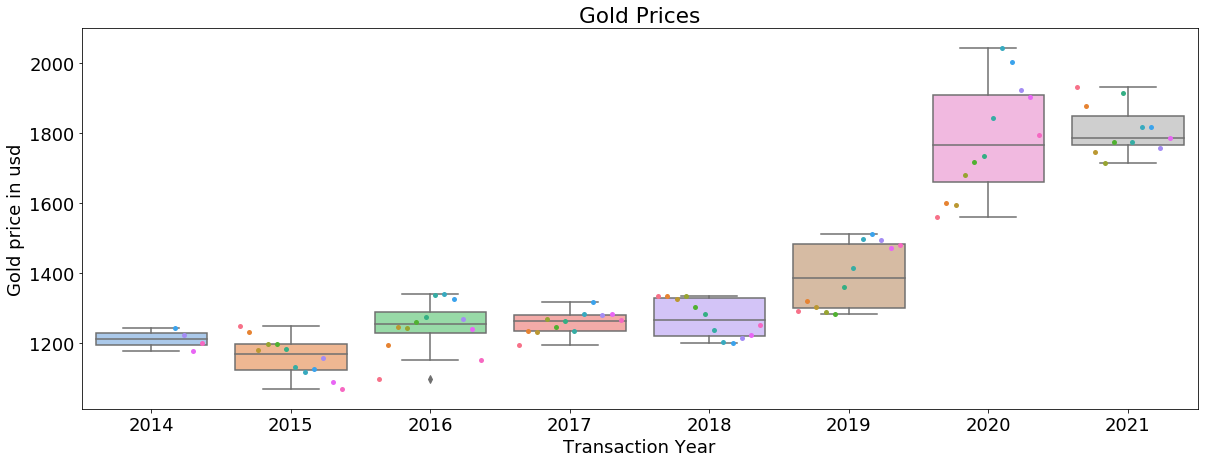

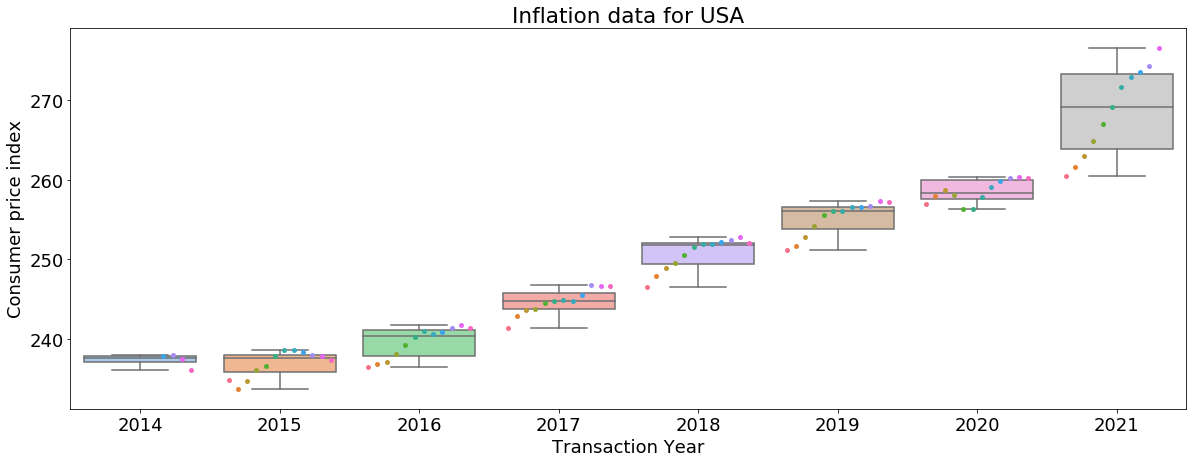

In [5]:
#some figure formatting here:
plt.rcParams['figure.figsize'] = [20, 7]
plt.rcParams.update({'font.size': 18})

# Averaging yearly inflation data by averaging over each year:
yr_cpi = monthly_data.groupby([monthly_data['date'].dt.year]).mean()
yr_cpi.reset_index(level=0, inplace=True)
yr_cpi['date'] = pd.to_datetime(yr_cpi['date'], format='%Y')

# Box plots for different assets over the year:

#Bitcoin main EDA figure:
fig_11, ax_11 = plt.subplots()
#monthly data:
ax_11 = sns.boxenplot(y = bitcoin['close'], x = bitcoin['date'].dt.year, hue = bitcoin['date'].dt.month, linewidth = 2.5, palette = 'husl')
#yearly distribution:
sns.boxplot(y = bitcoin['close'], x = bitcoin['date'].dt.year, palette = 'pastel',  ax = ax_11, linewidth = 1)
ax_11.set(ylabel = 'Price of Bitcoin in dollars', xlabel = 'Transaction Year', title = 'Bitcoin Data (Closing Price): Monthly and Yearly Distribution')
plt.legend([],[], frameon=False)

#Bitcoin will need an inset figure to show data from the earlier years. The parameters if this inset are defined here
l12, b12, w12, h12 = [0.18, 0.4, 0.25, 0.4]
#adding inset to the main figure;
ax_12 = fig_11.add_axes([l12, b12, w12, h12])
#defining smaller range for the inset:
sns.boxenplot(y = bitcoin['close'], x = bitcoin['date'].dt.year, hue = bitcoin['date'].dt.month, linewidth = 2.5, palette = 'husl', ax = ax_12)
sns.boxplot(y = bitcoin['close'], x = bitcoin['date'].dt.year, palette = 'pastel',  ax = ax_12, linewidth = 1)
ax_12.set(xlim = [-0.50,2.5], ylim = [0,1000], ylabel = '', xlabel = '')
plt.legend([],[], frameon=False)
plt.show(ax_11, ax_12)

#S&P index data EDA:
#monthly data:
ax_21 = sns.boxenplot(y = sp500['close'], x = sp500['date'].dt.year, hue = sp500['date'].dt.month, linewidth = 2.5, palette = 'husl')
#yealy distribution:
sns.boxplot(y = sp500['close'], x = sp500['date'].dt.year, palette = 'pastel', ax = ax_21, linewidth = 1)
ax_21.set(ylabel = 'S&P index', xlabel = 'Transaction Year', title = 'S&P index at closing time: Monthly and Yearly Distribution' )
plt.legend([],[], frameon=False)
plt.show(ax_21)

#Gold data:
#yearly distribution:
ax_31  = sns.boxplot(y = monthly_data['gold_usd'], x = monthly_data['date'].dt.year, palette = 'pastel')
#monthly data (the swarm plot becomes a scatter plot for categorical data when there is only one data point per hue):
sns.swarmplot(y = monthly_data['gold_usd'], x = monthly_data['date'].dt.year, hue =monthly_data['date'].dt.month, palette = 'husl', dodge = 1)
#stylistic changes:
ax_31.set(ylabel = 'Gold price in usd', xlabel = 'Transaction Year', title = 'Gold Prices')
plt.legend([],[], frameon=False)
plt.show(ax_31)

#Inflation data:
#yearly distribution:
ax_41  = sns.boxplot(y = monthly_data['cpi_us'], x = monthly_data['date'].dt.year, palette = 'pastel')
#monthly data (same trick with swarm plot):
sns.swarmplot(y = monthly_data['cpi_us'], x = monthly_data['date'].dt.year, hue =monthly_data['date'].dt.month, palette = 'husl', dodge = 1)
#stylistic changes:
ax_41.set(ylabel = 'Consumer price index', xlabel = 'Transaction Year', title = 'Inflation data for USA')
plt.legend([],[], frameon=False)
plt.show()

We would like to point out a few interesting trends that are visible from our EDA graphs:

    - It seems that most of the growth spurts in Bitcoin are exponential in nature (most apparent in 2015, 2016, and 2020). In contrast, the growth spurts in S&P index tend to be more linear. The inflation index follows a logarithmic growth that resets every year (cycle of about 12 months, CPI seems to climb for the first half of each year, before slowing down and flattening out to a steady number by the end of the year). There are frequent growth spurts in the gold data, but it is harder to call out any patterns of the growth spurts there.
    - A market correction event is defined as a drop (~ 15-20 %) in value of the asset after a growth spurt has occured. A good example would be the change seen in bitcoin prices between 2017 and 2018. Market correction occurs frequently for Bitcoin, but not as frequently as it does for gold prices. Almost all growth spurts in the price of gold seem to be followed by a correction. S&P 500 has some big instances of market correction (early 2020 for example), but they are not as common as the ones seen for gold or Bitcoin. Inflation index has no market correction events, but the rate of increase slows down as mentioned earlier.
    - Over the observed period of 7 years, the overall growth (with respect to initial asset value) was largest for Bitcoin and smallest for Gold.
    - The largest variability (size of box vs position of median) in asset value is seen in Bitcoin followed by Gold. S&P 500 index has a couple years where variability is large, but overall they seem to have a smaller spread over a given time than gold.    
    
It is important to note here that box plots quantify variability and not necessarily volatility (although, as mentioned previously, the number of outliers act as a crude estimate of volatility). A steady rise in our asset values should be flagged as growth, not volatility. Moreover, the values in this EDA have not been normalized, whereas volatility is often measured in terms of the value of the underlying asset. Plotting them in this kind of unscaled y axis means that relatively small fluctutations in large values are more visible than relatively large fluctuations in small values. This is most apparent in Bitcoin prices, where the data from 2014 to 2016 had to be enlarged (i.e. different scale), just to visualize the high variability present in the prices. Dividing the data into months allows us to estimate spreads and outliers, but it also creates an artifical divide in the data. With this in mind, our next step will be to define indices to better quantify volatility and growth of our assets. 

<a id = 'link_2'></a>
## 2. Defining Indices
<a id = 'link_21'></a>
### 2.1 Daily Growth Index (DGI)
In this section, we define several index values designed to track the variability and growth in our assets over different time periods. We start by defining growth index (GIs) as the change in value of an asset over a given period of time, normalized by the starting value of the asset. So, a daily growth index (DGI) would be:
$$
DGI_{i} = \frac{close_{i} - close_{i-1}}{close_{i-1}},
$$ 
and the $n^{th}$ day growth index would be:
$$
nGI_{i} = \frac{close_{i} - close_{i - n}}{close_{i - n}}.
$$
We define a function that can do this calculation for us, and calculate a moving daily growth index for Bitcoin and S&P 500. Autocorrelation of the DGI using different lag periods were calculated for Bitcoin and S&P 500. There is little to no autocorrelation in Bitcoin prices, and no observable trend in the autocorrelation data. On the other hand, S&P 500 index values have significant autocorrelation, with an alternating trend visible from looking at the first 20 data points. A lag of 20 data points amounts to a time period of about one month (30 days $-$ 4.5 weekends ~ 21 days) for our S&P data. We saw in the EDA that S&P 500 index vaues had the least number of market correction events (defined in the EDA as more than 15 % decrease over a month). The EDA information together with the autocorrelation trend suggest that S&P index values undergo small corrections on a day to day basis rather than large market correction events. 

Unfortunately, we were unable to do a similary thorough autocorrelation study for gold prices, since daily prices of gold are not available.

(Note: Although beyond the scope of my project, the lack of autocorrelation in the Bitcoin prices also hints at difficulties in predicting bitcoin prices based on historical data. This fact alone could be enough for an investment fund with a good enough model for predicting S&P 500 returns to avoid investing in Bitcoins.)

In [6]:
#Define a function to calculate a moving growth index. 
#This fucntion will take a dataframe object, and calculate a moving growth index for values of a given column 'ColV'
#The growth index is calculated by comparing i and i - lag_n values of ColV.
#The initial lag_n values are set to 0.
def nGI(df, lag_n = 5, colV = 'close'):
    col_name = str(lag_n) + '_GI_of_' + colV
    for i in range(0, df.shape[0]-lag_n):
        df.loc[df.index[i+lag_n], col_name] = (df.loc[df.index[i+lag_n], colV] - df.loc[df.index[i], colV]) / df.loc[df.index[i], colV]
    
    #two ways to handle the first lag_n terms that are Na. We can drop them or set them to zero. I choose to drop them.
    df.dropna(inplace = True)
    #df[col_name] = df[col_name].fillna(0)

#calculate the 1 day growth in bitcoin and S&P 500:
nGI(bitcoin, 1)
nGI(sp500, 1)

#Uncomment the next lines to see the new data frames:
#print(bitcoin.head())
#print(sp500.head())

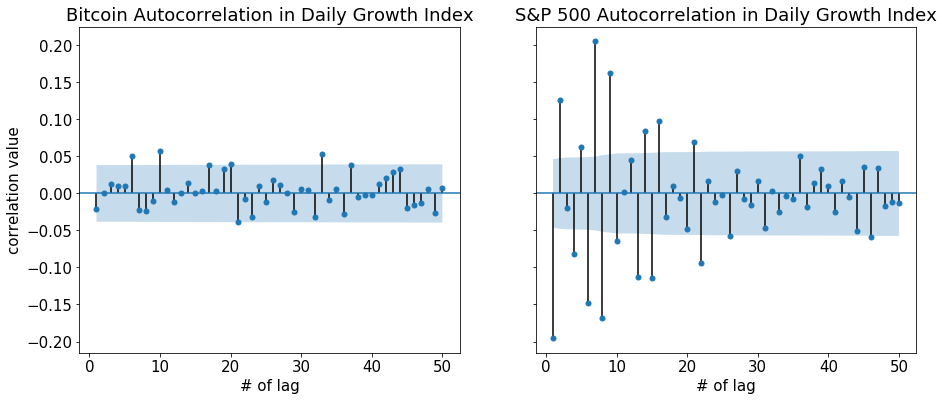

In [7]:
#Plotting autocorrelation of DGIs:

#stylistic changes to plots:
plt.rcParams['figure.figsize'] = [15, 6]
plt.rcParams.update({'font.size': 15})

#plotting autocorrelation in growth indices for different lag period:
fig_51, (ax_51, ax_52) = plt.subplots( nrows = 1, ncols = 2, sharey = True)


plot_acf(x = bitcoin['1_GI_of_close'], lags = 50, zero = 0, ax = ax_51, title = 'Bitcoin Autocorrelation in Daily Growth Index')
plot_acf(x = sp500['1_GI_of_close'], lags = 50, zero = 0, ax = ax_52, title = 'S&P 500 Autocorrelation in Daily Growth Index')
ax_51.set(xlabel = '# of lag', ylabel = 'correlation value')
ax_52.set(xlabel = '# of lag')
plt.show()

<a id = 'link_22'></a>
### 2.2 Monthly Growth Index (MGI) as measure of return
We have also calculated the monthly growth index (MGIs) for bitcoin, S&P 500, inflation (cpi) and gold data. For bitcoin, MGI is calculated using a $n$ = 30, while for S&P 500, $n$ = 21, and for Gold and cpi, $n$ = 1. After calculating a moving MGI for our data, we can calculate a ECDF of the MGI to roughly estimate the returns and volatility of our assets.  

In [8]:
#calculate the 1 month growth in bitcoin, S&P 500, gold and cpi:
#we have assumed that there are 30 days in a month:
nGI(bitcoin, 30)
#we have assumed here that there are 4.5 weekends in 1 month.
nGI(sp500, 21)
#for gold and cpi, lag_n = 1 is used.
nGI(monthly_data, 1, colV = 'gold_usd')
nGI(monthly_data, 1, colV = 'cpi_us')

#uncomment the functions below to view the data frames
#print(bitcoin.head())
#print(sp500.head())
#print(monthly_data.head())

#dividing data into training and validation sets:
#train_b, test_b = np.split(bitcoin.sample(frac=1, random_state=26),[int(.6*len(df)), int(.8*len(df))])



#defining probability functions according to MGIs:
ax_62 = sns.ecdfplot(x = bitcoin['30_GI_of_close'], color = 'b')
sns.ecdfplot(x = sp500['21_GI_of_close'], ax = ax_62, color = 'r')
sns.ecdfplot(x = monthly_data['1_GI_of_gold_usd'], ax = ax_62,  color = 'g')
plt.axvline(x = monthly_data['1_GI_of_gold_usd'].mean())
plt.axhline(y = 0.5)
plt.legend(labels = ['bitcoin returns', 'S&P returns', 'gold returns', 'average inflation'])
ax_62.set(xlabel = 'Potential Return in 1 month normalized to intial asset value', ylabel = 'Cumulative Distribution', xlim = [-0.5,0.5])
plt.show()

AttributeError: module 'seaborn' has no attribute 'ecdfplot'

The figure above shows the cumulative distribution of our data. The x axis denotes the potential return on investment. The return on investment associated with a cumulative distribution value of 0.5 should relate to the most probable return of investment of that asset. For example, the 0.5 distribution line intersects the bitcoin distribution at around 0.05. This would mean that for every dollor invested in bitcoin, there is a 50 %  chance that the return on investment in one month will be more than 0.05 dollars. Using this approximation, we can see that bitcoin has the largest potential for return on investment, followed by S&P 500 index and finally gold.  

We have also plotted a straight line that indicates the average cpi growth. The intersection of this line with the cumulative distribution of an asset should be a measure of the probability of that asset to underperform comapred to inflation. For example, bitcoin distribution intersects the line at about 0.41. This would suggest that there is a 41 % probability for inflation to outperform bitcoin for any random month long period selected dover the data period. S&P 500 is actually a better bet against inflation, with a 38 % probability to underperform when compared to inflation. Lastly, gold is not the best hedge against inflation, as it is more likely (by a small margin 51 % vs 49 %) for inflation to outgrow gold prices.  

The area under the curves should give also allow for a decent estimation of variability in the asset. The large tail of the bitcoin prices suggest that bitcoin is the most volatile of the assets with S&P 500 acting as the best asset in terms of volatility. 

<a id = 'link_31'></a>
### 3. Concluding Remarks
Based on our small amount of analysis, we have determined that:

	1. Historically, Bitcoin has be a good hedge against inflation around 59 % of the time.  
	2. It is likely that Bitcoin will outperform both gold and S&P 500 over a long period of time.
    3. S&P 500 seems to have the lower volatility and better returns than gold. The protfolio should be divided between bitcoin and S&P 500 (the ratio was not determined in this work).
    
As for future work, a few big ideas would be:

	1. The probability distribution determined in section 2.2 using MGIs is a good start, but can be vastly imporved. The selection of n = 1 month period was random, and can be improved by running cross validation experiments to calculate the n that predicts a better probability distribution for each given asset. 
	2. In this work, we use the closing values to calculate returns and infer volatility from the growth index. Since we have more variables available, like the highs and lows, and the volume trades, we can further define an additional volatility index based on these factors. This would allow us to establish an additional confidence interval to the cumulative distribution comaprision shown in the last figure.
    3. It should be possible to calculate the ratio of bitcoin to S&P asset if the area under the cumulative distribution function is quantified.